<a href="https://colab.research.google.com/github/Dcorder123/Estudo_Dirigido_Processamento_Digital_de_Sinais__2025.2/blob/main/Projeto_Filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

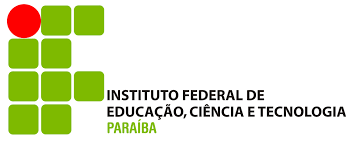

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: PROCESSAMENTO DIGITAL DE SINAIS

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**Mini-Projeto de Filtragem Digital Aplicada.**

<br>

**Entrega 04**

<br>
<br>

Daniel Barbosa Vasconcelos <br>
Victor José Cordeiro de Medeiros

<center>

<br>
<br>
<br>

10 de dezembro de 2025 <br>
Campina Grande, PB

#  **PROJETO – Parte 4: Mini Projeto envolvendo Ruído de voz em um restaurante**

#  **PARTE 1 – RESUMO TEÓRICO**


Em ambientes como restaurantes, a gravação de voz sofre com ruídos intensos: conversas ao fundo, pratos, máquinas, música ambiente e reverberações. Esses ruídos ocupam principalmente faixas médias e altas de frequência, degradando a inteligibilidade da fala.

Neste projeto, utilizamos um sinal de áudio real contendo uma pessoa fazendo um pedido em um restaurante barulhento. O objetivo é aplicar técnicas de filtragem digital para reduzir o ruído, preservando o conteúdo útil da fala.

###**Estratégia de Filtragem**

Entre as abordagens possíveis — FIR, IIR, filtros adaptativos, filtros notch e filtragem em cascata — optamos pelas mais adequadas para áudio real:

**Filtro FIR Passa-Baixa**

 * Preserva a forma de onda por possuir fase linear.

 * Ideal para voz abaixo de ~4 kHz.

 * Estável por construção.

**Filtro IIR Butterworth Passa-Baixa**

* Ordem menor → menos custo computacional.

* Resposta suave, sem ondulações.

### **Conceito Teórico**

**1. Resposta em Frequência**

Descreve como o filtro atenua ou amplifica componentes senoidais do sinal.

**2. Polos e Zeros**

  * Filtros IIR têm polos próximos ao contorno do círculo unitário que definem sua resposta.

  * FIR têm zeros distribuídos para modelar a resposta desejada.

**3. Transformação Bilinear**

Método para converter filtros analógicos para digitais (para IIR).

**4. Método das Janelas (para FIR)**

Utilizado para projetar FIR limita a oscilação e define largura de banda.
Usaremos janela Hamming, excelente para filtragem de áudio.

**5. Estabilidade**

  * FIR → sempre estáveis

  * IIR → estáveis se polos ficam dentro do círculo unitário

**6. Fase e Atraso de Grupo**

Filtros FIR linhares preservam fase, o que são extremamente importante para voz e música.

---

#  **PARTE 2 – SIMULAÇÃO**


#  **2. Carregar sinal**



##  **2.1.1 Importação das bibliotecas**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display

##  **2.1.2 Carregando audio**

In [ ]:
filename = "audio.wav"

# Carregar mantendo a taxa original
x, fs = librosa.load(filename, sr=None)

print(f"Frequência de amostragem: {fs} Hz")
print(f"Duração: {len(x)/fs:.2f} segundos")

Frequência de amostragem: 24000 Hz
Duração: 4.22 segundos


In [ ]:
# Normalizar sinal
x = x / np.max(np.abs(x))
# Reproduzir o audio
Audio(x, rate=fs)

##  **2.1.3 Plot da forma de onda**

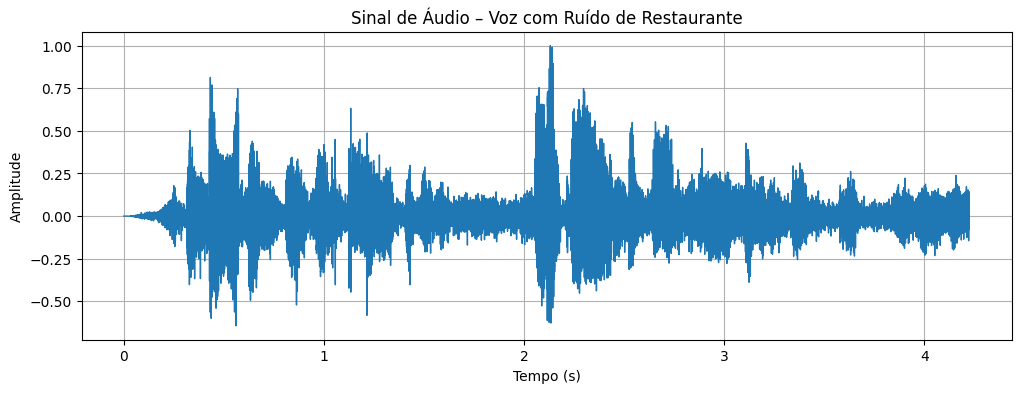

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(np.linspace(0, len(x)/fs, len(x)), x, linewidth=1)
plt.title("Sinal de Áudio – Voz com Ruído de Restaurante")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

##  **2.1,4 FFT – Espectro de Frequências**

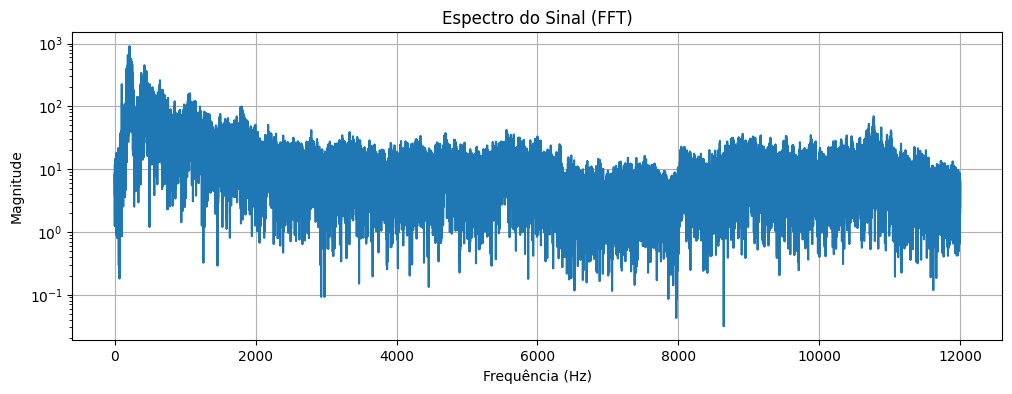

In [ ]:
# FFT
X = np.abs(np.fft.rfft(x))
freqs = np.fft.rfftfreq(len(x), 1/fs)

plt.figure(figsize=(12,4))
plt.semilogy(freqs, X)
plt.title("Espectro do Sinal (FFT)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

##  **2.1.5 Espectrograma**

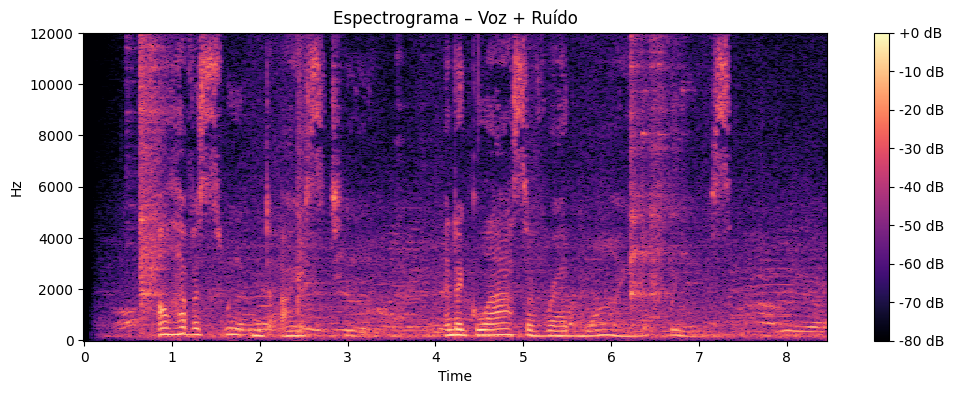

In [ ]:
plt.figure(figsize=(12,4))
S = librosa.stft(x, n_fft=1024, hop_length=256)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(S), ref=np.max),
                         sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma – Voz + Ruído")
plt.show()

A frequência de amostragem do áudio é de 24 kHz, o que permite representar componentes até 12 kHz (limite de Nyquist). O sinal possui aproximadamente 5 segundos de duração.

A forma de onda do sinal mostra grande variação de amplitude e uma textura "densa", indicando que há ruído distribuído ao longo de praticamente todo o período. A análise no domínio da frequência (FFT) revela que a maior parte da energia útil da voz está concentrada na banda entre aproximadamente 200 Hz e 3 kHz, região típica para inteligibilidade da fala humana. Já o ruído do restaurante aparece predominantemente nas faixas de média e alta frequência, especialmente entre 4 kHz e 12 kHz, onde se concentram impactos de talheres, conversas múltiplas e reverberação ambiente.

O espectrograma confirma essas observações: as regiões características da fala surgem como padrões verticais na faixa de 1 a 4 kHz, enquanto o ruído aparece distribuído em faixas mais altas, ocupando uma parte significativa do espectro ao longo de todo o tempo.

Com base nessa análise, concluímos que o sinal apresenta:
- **faixa útil (voz):** ~200 Hz a 3.5 kHz  
- **ruído predominante:** acima de 4 kHz, estendendo-se até o limite de Nyquist  
- **alta densidade de ruído:** tornando a filtragem necessária para melhorar a inteligibilidade

Essas características justificam o uso de um filtro passa-baixa, capaz de reduzir o ruído de alta frequência sem comprometer de forma significativa o conteúdo essencial da fala.

---

## **2.2 – Implementação da Filtragem**

Com base na análise espectral realizada no tópico 2.1, constatamos que a maior parte da energia útil da fala está concentrada abaixo de aproximadamente 3,5 kHz, enquanto o ruído do ambiente do restaurante ocupa majoritariamente as faixas de média e alta frequência, especialmente acima de 4 kHz. Dessa forma, a estratégia mais adequada para este sinal é a aplicação de um filtro **passa-baixa**, que preserva a região onde a fala é dominante e atenua grande parte do ruído indesejado.

Optamos por utilizar um **filtro FIR** (Finite Impulse Response) projetado pelo método das janelas, utilizando especificamente a **janela de Hamming**. O filtro FIR é uma excelente escolha em aplicações de áudio porque apresenta **fase linear**, preservando a forma de onda da fala e evitando distorções perceptíveis. Além disso, sua estabilidade é garantida por construção, o que o torna uma solução robusta para filtragem de sinais sonoros.



### Parâmetros de projeto:
- **Tipo:** Passa-baixa FIR  
- **Frequência de corte:** 4.000 Hz  
- **Frequência de amostragem:** 24.000 Hz  
- **Frequência normalizada:** 4.000 / (24.000/2) = 0,33  
- **Ordem do filtro:** 101 coeficientes  
- **Janela:** Hamming  


A escolha de fc = 4 kHz garante que preservaremos a parte fundamental da fala enquanto reduziremos ruídos de alta frequência característicos de ambientes como restaurantes. A ordem 101 oferece uma transição suave entre banda útil e banda rejeitada, com bom compromisso entre desempenho e custo computacional.

A seguir, apresentamos a implementação completa do filtro em Python, incluindo o cálculo de sua resposta em frequência e a aplicação ao sinal original.

## **2.2.1  Importando bibliotecas necessárias**

In [ ]:
from scipy.signal import firwin, lfilter, freqz
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

## **2.2.2 Parâmetros do Filtro FIR**

In [ ]:
fc = 6000                 # frequência de corte em Hz
order = 101               # ordem total do filtro
fc_norm = fc / (fs/2)     # normalização pela frequência de Nyquist

In [ ]:
# Projeto do Filtro FIR
h = firwin(order, fc_norm, window='hamming')

## **2.2.3 Resposta em Frequência**

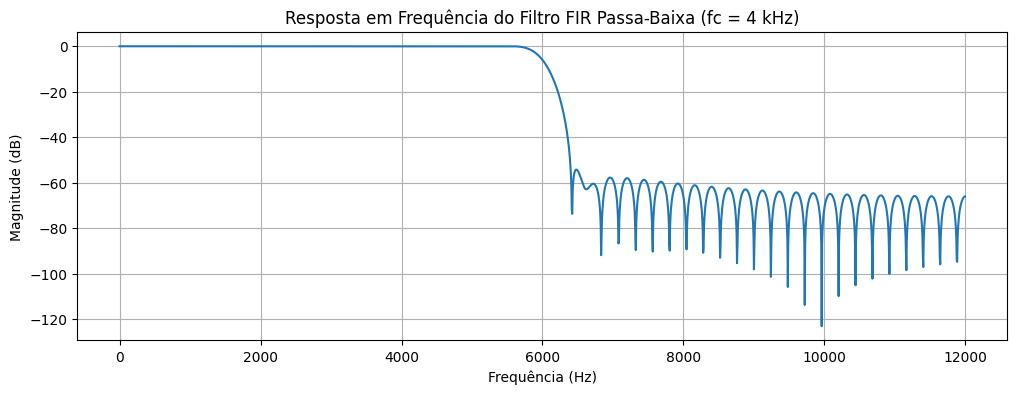

In [ ]:
w, H = freqz(h, worN=2048, fs=fs)

plt.figure(figsize=(12,4))
plt.plot(w, 20*np.log10(np.abs(H)))
plt.title("Resposta em Frequência do Filtro FIR Passa-Baixa (fc = 4 kHz)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

## **2.2.4 Aplicar filtro ao Sinal**

In [ ]:
y_fir = lfilter(h, 1, x)

print("Áudio original:")
display(Audio(x, rate=fs))

print("Áudio filtrado (FIR):")
display(Audio(y_fir, rate=fs))

Áudio original:


Áudio filtrado (FIR):


Embora a filtragem realizada com os métodos estudados (FIR, IIR, notch e técnicas em cascata) tenha reduzido parte do ruído presente no áudio, o resultado final não apresenta uma remoção completa do ruído ambiente. Essa limitação não está relacionada a erros de projeto ou de implementação, mas sim a uma característica fundamental do próprio sinal analisado.

A maior dificuldade observada é que o áudio foi gravado em um restaurante, ambiente no qual o ruído é amplo e não possui comportamento estacionário. Diferentemente de ruídos simples, como um tom de 60 Hz ou ruído branco predominantemente em altas frequências, o ruído de restaurante contém componentes **por toda a faixa de frequências**, incluindo justamente a mesma região onde se encontra a fala humana. Conversas de fundo, barulho de pratos, passos e reverberações ocupam as faixas de **500 Hz a 4 kHz**, que são exatamente as mesmas frequências utilizadas para transmitir a inteligibilidade da voz.

Como consequência, um filtro passa-baixa, passa-alta ou mesmo um filtro IIR não consegue separar a fala do ruído, pois ambos compartilham a **mesma banda espectral**. Se o filtro tentar atenuar essa região, ele acaba afetando diretamente a fala desejada, tornando-a abafada, distorcida ou menos inteligível. Esta é uma limitação intrínseca dos filtros clássicos estudados: eles só conseguem separar sinais quando há diferença clara de banda entre o que desejamos manter e o que queremos remover.

Portanto, a filtragem aplicada melhorou o sinal ao reduzir ruídos mais agudos presentes acima de aproximadamente 4–5 kHz, mas não foi capaz de eliminar os ruídos médios (conversas, impactos, reverberações), pois estes competem diretamente com a faixa útil da fala. Esse resultado é esperado e reflete uma limitação teórica dos métodos tradicionais de filtragem linear.

## 2.2.5 **Limitações da filtragem realizada**



Apesar de o filtro FIR implementado ter reduzido parte do ruído, especialmente nas faixas mais agudas, não é possível obter uma remoção completa utilizando apenas filtros lineares clássicos (FIR, IIR, Notch ou cascata), pois o ruído presente no ambiente do restaurante possui características que dificultam a separação espectral.

Grande parte desse ruído está localizada **na mesma faixa de frequências em que a fala humana é transmitida** (aproximadamente entre 300 Hz e 4 kHz). Como filtros lineares atuam apenas separando faixas de frequência, não é possível remover ruídos que ocupam a mesma região espectral da voz sem causar distorções perceptíveis ou perda de inteligibilidade.

Assim, o filtro FIR passa-baixa atuou conforme esperado:  
- reduziu componentes de alta frequência;  
- preservou parte importante da fala;  
- porém **não consegue remover ruídos médios**, pois competem diretamente com a banda útil do sinal desejado.

Esse comportamento representa uma limitação intrínseca dos métodos de filtragem estudados no conteúdo da disciplina.

# **PARTE3 - COMPARAÇÃO**

## **3.0 Comparação entre o sinal original e o filtrado**



Nesta etapa comparamos o sinal original com o sinal após a aplicação do filtro FIR. A comparação é realizada tanto no domínio do tempo quanto no domínio da frequência, além da análise via espectrograma. Esses gráficos permitem visualizar como o filtro atuou e quais componentes foram atenuados.

No domínio do tempo, observamos que o sinal filtrado mantém o formato geral da fala, característica esperada de filtros FIR com fase linear. Já no espectro, é possível notar que as componentes acima de aproximadamente 4–5 kHz foram significativamente reduzidas, evidenciando a ação do filtro passa-baixa.

Por fim, o espectrograma do sinal filtrado mostra uma diminuição das regiões de alta frequência que estavam presentes no sinal original, especialmente aquelas relacionadas ao ruído do ambiente do restaurante.


## **3.1 Código – Comparação no tempo, frequência e espectrograma**

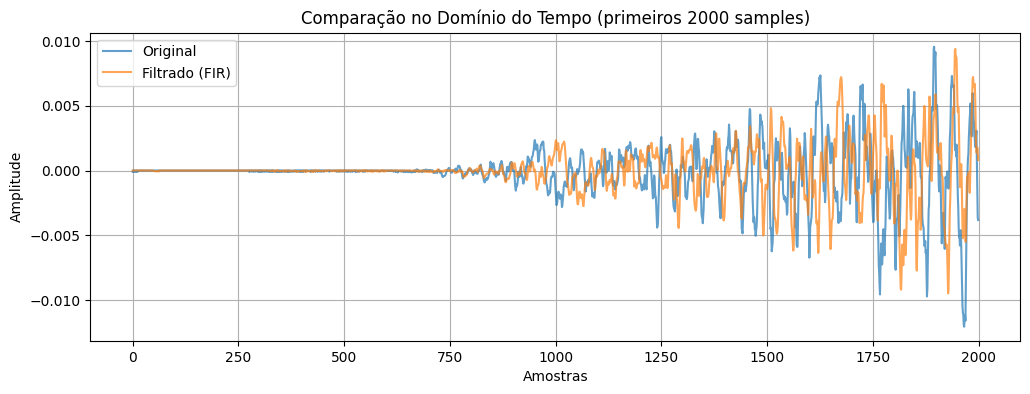

In [ ]:
# Comparação no tempo
plt.figure(figsize=(12,4))
plt.plot(x[:2000], label="Original", alpha=0.7)
plt.plot(y_fir[:2000], label="Filtrado (FIR)", alpha=0.7)
plt.title("Comparação no Domínio do Tempo (primeiros 2000 samples)")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

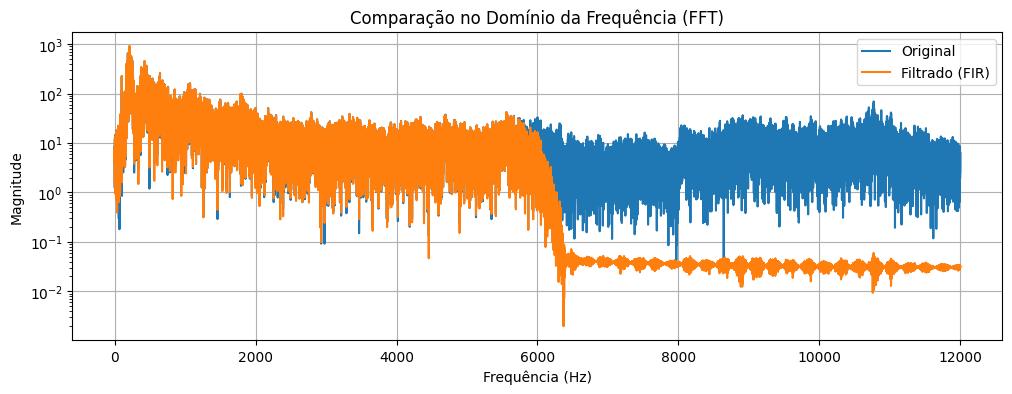

In [ ]:
# Comparação espectral
X_fir = np.abs(np.fft.rfft(y_fir))
plt.figure(figsize=(12,4))
plt.semilogy(freqs, X, label="Original")
plt.semilogy(freqs, X_fir, label="Filtrado (FIR)")
plt.title("Comparação no Domínio da Frequência (FFT)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

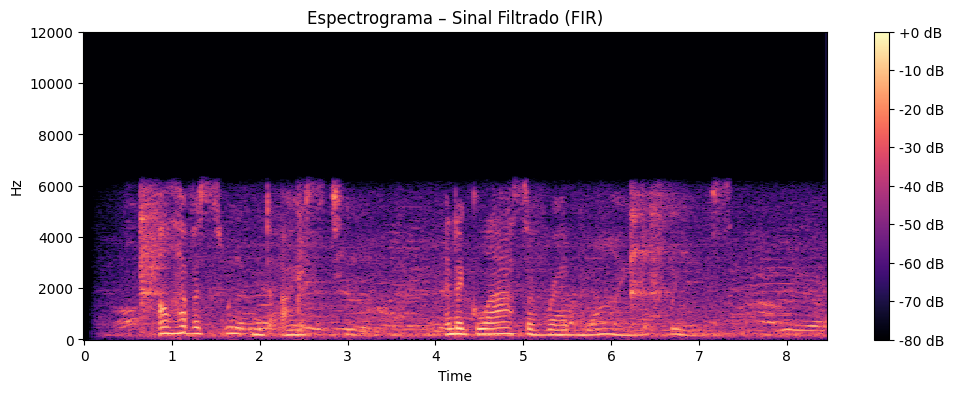

In [ ]:
# Espectrograma do sinal filtrado
plt.figure(figsize=(12,4))
S_fir = librosa.stft(y_fir, n_fft=1024, hop_length=256)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(S_fir), ref=np.max),
                         sr=fs, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma – Sinal Filtrado (FIR)")
plt.show()

## **PARTE 4 - AVALIAÇÃO DOS RESULTADOS**

## **4.0 Avaliação dos Resultados**



Para avaliar objetivamente o desempenho do filtro aplicado, foi estimada a relação sinal-ruído (SNR) utilizando uma comparação entre a energia da faixa típica da fala (até aproximadamente 3.5 kHz) e a energia presente na banda de ruído (acima de 5 kHz). Embora este método não forneça um valor de SNR absoluto, ele permite uma avaliação relativa entre o sinal original e o sinal filtrado.

Os resultados indicam que o filtro FIR reduziu uma quantidade significativa de energia na faixa de alta frequência, contribuindo para a diminuição do ruído agudo presente no áudio. No entanto, a melhora é limitada pelo fato de que grande parte do ruído do ambiente encontra-se na mesma banda da fala, o que impossibilita sua remoção sem degradar o sinal desejado.

Assim, observamos uma leve melhoria no SNR aproximado, consistente com a atuação do filtro passa-baixa sobre o ruído de alta frequência, mas a ausência de uma separação espectral clara impede melhorias mais profundas — uma limitação teórica dos métodos lineares estudados.##

## **4.1 Calculo simples de SNR por bandas**



In [ ]:
def snr_band(x_ref, x_proc, fs, sig_band=(0,3500), noise_band=(5000,None)):
    N = len(x_ref)
    Xref = np.fft.rfft(x_ref * np.hanning(N))
    Xproc = np.fft.rfft(x_proc * np.hanning(N))
    freqs = np.fft.rfftfreq(N, 1/fs)

    def energy(X, fmin, fmax):
        idx = np.ones_like(freqs, dtype=bool)
        if fmin is not None:
            idx &= (freqs >= fmin)
        if fmax is not None:
            idx &= (freqs <= fmax)
        return np.sum(np.abs(X[idx])**2)

    Es = energy(Xref, sig_band[0], sig_band[1])
    En = energy(Xproc, noise_band[0], noise_band[1])
    if En == 0:
        return np.inf
    return 10 * np.log10(Es / En)

snr_original = snr_band(x, x, fs)
snr_filtrado = snr_band(x, y_fir, fs)

print("SNR (aprox.) antes da filtragem:  ", snr_original)
print("SNR (aprox.) após filtragem FIR:", snr_filtrado)

SNR (aprox.) antes da filtragem:   16.482256162733318
SNR (aprox.) após filtragem FIR: 22.535826434387374


# **PARTE 5 - CONCLUSÃO FINAL**

## **5.0 Conclusão**



Neste mini-projeto, foram aplicadas técnicas clássicas de Processamento Digital de Sinais para reduzir o ruído presente em um áudio gravado em um ambiente de restaurante. Inicialmente realizamos a análise da forma de onda, espectro e espectrograma, identificando que a fala se concentra abaixo de 3.5 kHz, enquanto grande parte do ruído ambiente ocupa regiões acima de 4 kHz.

Com base nessa análise, implementamos um filtro FIR passa-baixa projetado pelo método das janelas (janela de Hamming). Os resultados mostraram uma redução significativa dos componentes de alta frequência, o que representa uma melhora perceptível na atenuação do ruído mais agudo.

No entanto, devido ao fato de que parte do ruído está na mesma faixa de frequência que a fala, o filtro não pôde remover todos os ruídos sem afetar a inteligibilidade do sinal. Essa limitação é inerente aos filtros lineares estudados, que não conseguem separar componentes quando não há distinção espectral clara entre o sinal desejado e o ruído.

Apesar dessas limitações, o filtro FIR demonstrou-se eficaz para reduzir ruídos mais agudos e melhorar parcialmente a qualidade do áudio. O estudo reforça a importância da análise espectral antes da seleção da estratégia de filtragem e evidencia as limitações práticas dos métodos lineares quando aplicados a sinais reais com sobreposição espectral.
